In [1]:
import networkx
from matplotlib import image
from matplotlib import pyplot as plt

In [5]:
path_to_input = "Input path here"
path_to_output = None # (Option) path to output file in jpeg, jpg or png format

In [138]:
def GraphToCoordinates(graph, root, x_shift, depth):
  result = {}
  if (len(graph[root]) == 0):
    return {root: (x_shift, depth)}, x_shift
    
  cur_shift = x_shift
  x_coord = 0
  most_right = 0
  max_depth = 0
  for i, child in enumerate(graph[root]):
    subgraph, most_right = GraphToCoordinates(graph, child, cur_shift, depth + 1)
    if len(graph[root]) % 2 == 0 and (i + 1) * 2 == len(graph[root]):
      x_coord = most_right + 1
      most_right += 1
    if len(graph[root]) % 2 == 1 and i * 2 + 1 == len(graph[root]):
      x_coord = subgraph[child][0]
    cur_shift = most_right + 1
    result.update(subgraph)
  result.update({root: (x_coord, depth)})
  return result, most_right
  
def PrintGraph(graph_edges, nodes_coordinates, filename=None):
  for node, childs in graph_edges.items():
    for child in childs:
      first = nodes_coordinates[node]
      second = nodes_coordinates[child]
      plt.plot((-first[0], -second[0]), (-first[1], -second[1]), color='black', linewidth=2,
               marker='o', label='line with marker', markerfacecolor='red')
  plt.axis('off')
  if filename is not None:
    plt.savefig(filename, dpi=100)
  plt.show()

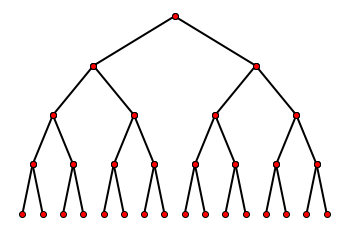

In [139]:
graph = networkx.read_graphml(path_to_input)

graph_edges = {}
for k, nodes in graph.adjacency():
  graph_edges[k] = []
  for node in nodes:
    graph_edges[k].append(node)

nodes_coordinates, _ = GraphToCoordinates(graph_edges, next(graph.adjacency())[0], 0, 0)
PrintGraph(graph_edges, nodes_coordinates, path_to_output)